In [3]:
!pip install tensorflow


In [4]:
import tensorflow as tf
print(tf.__version__)

2.18.0


C:\Users\HP\AppData\Local\Temp\ipykernel_2912\370600343.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_comment'].fillna("", inplace=True)  # Replace NaN with an empty string



🔹 Random Forest Model Performance:
Accuracy: 0.9155844155844156
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.91      1.00      0.95       136
           2       1.00      0.20      0.33         5

    accuracy                           0.92       154
   macro avg       0.97      0.50      0.59       154
weighted avg       0.92      0.92      0.89       154

ROC AUC Score: 0.7944497802971796


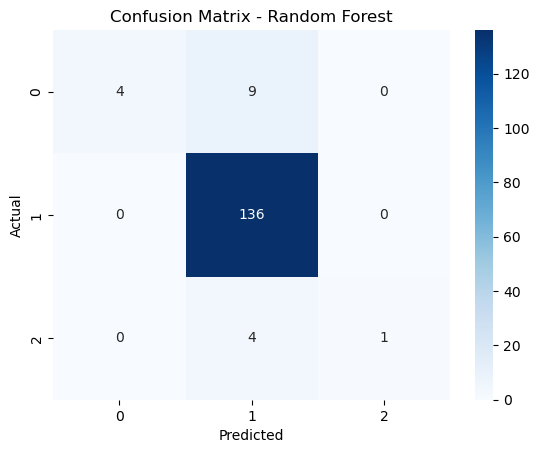


🔹 Gradient Boosting Model Performance:
Accuracy: 0.9155844155844156
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.91      1.00      0.95       136
           2       1.00      0.20      0.33         5

    accuracy                           0.92       154
   macro avg       0.97      0.50      0.59       154
weighted avg       0.92      0.92      0.89       154

ROC AUC Score: 0.7765188221004952


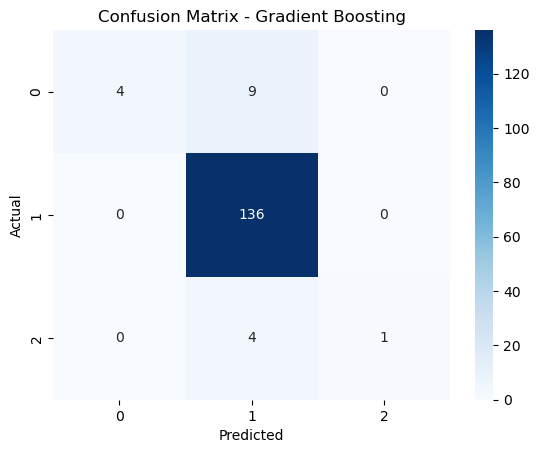


✅ Random Forest & Gradient Boosting models saved successfully!
Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.8127 - loss: 0.6257 - val_accuracy: 0.8831 - val_loss: 0.4690
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9094 - loss: 0.3729 - val_accuracy: 0.8831 - val_loss: 0.4401
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9084 - loss: 0.3471 - val_accuracy: 0.8831 - val_loss: 0.4539
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9264 - loss: 0.3109 - val_accuracy: 0.8831 - val_loss: 0.4401
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9281 - loss: 0.3117 - val_accuracy: 0.8831 - val_loss: 0.4439
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9314 - loss: 0.3057 - val_accuracy: 0.8831 - val_loss: 0.4386
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9172 - loss: 0.3414 - val_accuracy: 0.8831 - val_loss: 0.4401
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9244 - loss: 0.3288 - val_accuracy: 0.8831 - val_lo


✅ LSTM Model & Tokenizer saved successfully in: D:/Files/2024/academics/AAiT Training/DAV/Capstone project/model_outputs


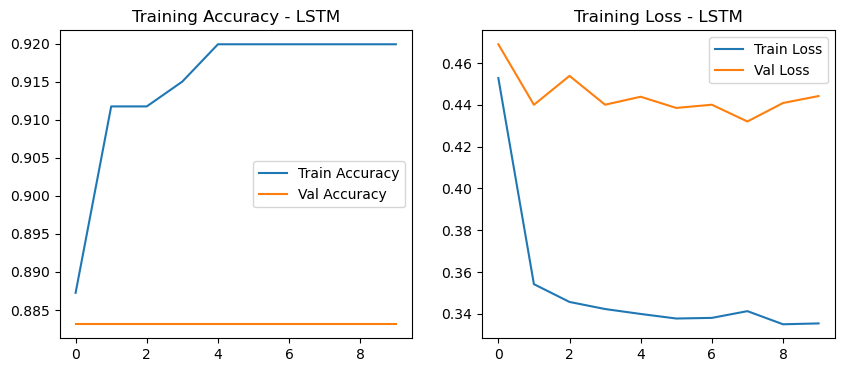


✅ LSTM Training Accuracy & Loss Plots saved successfully in: D:/Files/2024/academics/AAiT Training/DAV/Capstone project/model_outputs


In [7]:
import os
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 📌 Step 1: Set Save Directory
base_dir = "D:/Files/2024/academics/AAiT Training/DAV/Capstone project/"
output_dir = os.path.join(base_dir, "model_outputs")

# Create directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 📌 Step 2: Load the Dataset
file_path = os.path.join(base_dir, "manually_labeled_reviews.csv")
df = pd.read_csv(file_path)

# 📌 Step 3: Handle Missing Values
df['Review_comment'].fillna("", inplace=True)  # Replace NaN with an empty string

# 📌 Step 4: Convert Sentiment to Numeric Labels
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# 📌 Step 5: Convert Review Comments to TF-IDF Features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Review_comment'])
y = df['Sentiment']

# 📌 Step 6: Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 7: Train Random Forest Model
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)

# 📌 Step 8: Train Gradient Boosting Model
clf_gb = GradientBoostingClassifier(n_estimators=100)
clf_gb.fit(X_train, y_train)

# 📌 Step 9: Evaluate Models
models = {'Random Forest': clf_rf, 'Gradient Boosting': clf_gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"\n🔹 {name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    
    # 📌 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📌 Step 10: Save ML Models
joblib.dump(vectorizer, os.path.join(output_dir, "tfidf_vectorizer.pkl"))
joblib.dump(clf_rf, os.path.join(output_dir, "random_forest_model.pkl"))
joblib.dump(clf_gb, os.path.join(output_dir, "gradient_boosting_model.pkl"))

print("\n✅ Random Forest & Gradient Boosting models saved successfully!")

# ---------------------------
# 📌 Step 11: Deep Learning (LSTM Model)
# ---------------------------

# Tokenization for Deep Learning
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Review_comment'])
X_seq = tokenizer.texts_to_sequences(df['Review_comment'])
X_padded = pad_sequences(X_seq, padding='post', maxlen=100)

# Train-test split for Deep Learning
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define LSTM Model
lstm_model = Sequential([
    Embedding(5000, 128, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(3, activation='softmax')  # Output for 3 classes (Positive, Negative, Neutral)
])

# Compile model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train LSTM Model
history = lstm_model.fit(X_train_dl, y_train_dl, validation_data=(X_test_dl, y_test_dl), epochs=10, batch_size=32)

# 📌 Save LSTM Model
lstm_model.save(os.path.join(output_dir, "lstm_sentiment_model.h5"))
joblib.dump(tokenizer, os.path.join(output_dir, "tokenizer.pkl"))

print("\n✅ LSTM Model & Tokenizer saved successfully in:", output_dir)
# 📌 Step 12: Plot & Save Training Accuracy & Loss
plt.figure(figsize=(10, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training Accuracy - LSTM")
plt.savefig(os.path.join(output_dir, "lstm_training_accuracy.png"))  # Save Accuracy Plot

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training Loss - LSTM")
plt.savefig(os.path.join(output_dir, "lstm_training_loss.png"))  # Save Loss Plot

plt.show()  # Show the plots

print("\n✅ LSTM Training Accuracy & Loss Plots saved successfully in:", output_dir)

